# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
#!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Dependencies
import json
import requests
from api_keys import weather_api_key

#setting values
i=0;
set=1;

#lists to create a dataframe
city_name=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

url = "http://api.openweathermap.org/data/2.5/weather?"



print("Beginning Data Retreival")
print("-----------------------------")
for n,city in enumerate(cities):
    i+=1
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + "imperial"
        request=requests.get(query_url).json()
        city_name.append(request['name'])
        lat.append(request['coord']['lat'])
        lng.append(request['coord']['lon'])
        max_temp.append(request['main']['temp_max'])
        humidity.append(request['main']['humidity'])
        cloudiness.append(request['clouds']['all'])
        wind_speed.append(request['wind']['speed'])
        country.append(request['sys']['country'])
        date.append(request['dt'])
        print(f"Processing Record {i} of set {set} | City Id: {request['id']} City Name: {request['name']}")
    except:
        print("City not found Skipping...")
    if(i%50==0):
        i=0
        set=set+1

Beginning Data Retreival
-----------------------------
Processing Record 1 of set 1 | City Id: 1513131 City Name: Navoiy
Processing Record 2 of set 1 | City Id: 2208248 City Name: Kaitangata
Processing Record 3 of set 1 | City Id: 6690297 City Name: Saint-Leu
Processing Record 4 of set 1 | City Id: 1015776 City Name: Bredasdorp
Processing Record 5 of set 1 | City Id: 3833367 City Name: Ushuaia
Processing Record 6 of set 1 | City Id: 5746545 City Name: Portland
Processing Record 7 of set 1 | City Id: 1627877 City Name: Sembakung
Processing Record 8 of set 1 | City Id: 2206939 City Name: Bluff
Processing Record 9 of set 1 | City Id: 934322 City Name: Mahébourg
Processing Record 10 of set 1 | City Id: 1507390 City Name: Dikson
Processing Record 11 of set 1 | City Id: 286245 City Name: Sur
Processing Record 12 of set 1 | City Id: 3424607 City Name: Tasiilaq
Processing Record 13 of set 1 | City Id: 6111696 City Name: Port-Cartier
Processing Record 14 of set 1 | City Id: 4032243 City Name: V

Processing Record 26 of set 3 | City Id: 3421719 City Name: Narsaq
Processing Record 27 of set 3 | City Id: 3835869 City Name: Santiago del Estero
Processing Record 28 of set 3 | City Id: 2221530 City Name: Tibati
Processing Record 29 of set 3 | City Id: 2507480 City Name: Algiers
Processing Record 30 of set 3 | City Id: 2961459 City Name: Skibbereen
Processing Record 31 of set 3 | City Id: 159492 City Name: Ifakara
Processing Record 32 of set 3 | City Id: 2079582 City Name: Alyangula
Processing Record 33 of set 3 | City Id: 2161515 City Name: Kiama
Processing Record 34 of set 3 | City Id: 933815 City Name: Dekar
Processing Record 35 of set 3 | City Id: 460312 City Name: Dobele
Processing Record 36 of set 3 | City Id: 1263917 City Name: Māndal
Processing Record 37 of set 3 | City Id: 1106677 City Name: Bambous Virieux
Processing Record 38 of set 3 | City Id: 1244926 City Name: Hambantota
Processing Record 39 of set 3 | City Id: 2400578 City Name: Fougamou
Processing Record 40 of set 3 

Processing Record 2 of set 6 | City Id: 3355672 City Name: Lüderitz
Processing Record 3 of set 6 | City Id: 1253237 City Name: Verāval
Processing Record 4 of set 6 | City Id: 1584071 City Name: Da Lat
Processing Record 5 of set 6 | City Id: 779622 City Name: Havøysund
Processing Record 6 of set 6 | City Id: 2126710 City Name: Beringovskiy
Processing Record 7 of set 6 | City Id: 5983720 City Name: Iqaluit
Processing Record 8 of set 6 | City Id: 1526041 City Name: Atasū
Processing Record 9 of set 6 | City Id: 87205 City Name: Darnah
Processing Record 10 of set 6 | City Id: 1525376 City Name: Bestöbe
Processing Record 11 of set 6 | City Id: 1067565 City Name: Beloha
City not found Skipping...
Processing Record 13 of set 6 | City Id: 4004293 City Name: Ixtapa
Processing Record 14 of set 6 | City Id: 1985663 City Name: Cikupa
Processing Record 15 of set 6 | City Id: 5563839 City Name: Fortuna
Processing Record 16 of set 6 | City Id: 2189343 City Name: Kaeo
City not found Skipping...
Process

Processing Record 28 of set 8 | City Id: 686090 City Name: Asău
Processing Record 29 of set 8 | City Id: 2640351 City Name: Peterhead
Processing Record 30 of set 8 | City Id: 80509 City Name: Al Bardīyah
Processing Record 31 of set 8 | City Id: 5993072 City Name: Kitimat
Processing Record 32 of set 8 | City Id: 3867427 City Name: Mayor Pablo Lagerenza
Processing Record 33 of set 8 | City Id: 1268865 City Name: Jodhpur
City not found Skipping...
Processing Record 35 of set 8 | City Id: 932987 City Name: Tsabong
Processing Record 36 of set 8 | City Id: 4844309 City Name: Torrington
Processing Record 37 of set 8 | City Id: 5545269 City Name: Price
Processing Record 38 of set 8 | City Id: 4726521 City Name: San Patricio
Processing Record 39 of set 8 | City Id: 2071860 City Name: Esperance
Processing Record 40 of set 8 | City Id: 463655 City Name: Zenzeli
Processing Record 41 of set 8 | City Id: 2527087 City Name: Tiznit Province
Processing Record 42 of set 8 | City Id: 5245387 City Name: B

Processing Record 7 of set 11 | City Id: 3674292 City Name: Mosquera
Processing Record 8 of set 11 | City Id: 2136150 City Name: Luganville
City not found Skipping...
Processing Record 10 of set 11 | City Id: 2180815 City Name: Tuatapere
Processing Record 11 of set 11 | City Id: 2126785 City Name: Belaya Gora
Processing Record 12 of set 11 | City Id: 5983607 City Name: Inuvik
Processing Record 13 of set 11 | City Id: 342711 City Name: Barentu
Processing Record 14 of set 11 | City Id: 5789856 City Name: Cheney
Processing Record 15 of set 11 | City Id: 3724696 City Name: Gonaïves
Processing Record 16 of set 11 | City Id: 4560349 City Name: Philadelphia
Processing Record 17 of set 11 | City Id: 6145890 City Name: Shelburne
City not found Skipping...
Processing Record 19 of set 11 | City Id: 3523222 City Name: Mier
Processing Record 20 of set 11 | City Id: 2126682 City Name: Bilibino
City not found Skipping...
Processing Record 22 of set 11 | City Id: 3461425 City Name: Ilhabela
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#converting the date into readable format
readable_date=[]
for x in range(0,len(date)):
    timestamp = datetime.datetime.fromtimestamp(date[x])
    readable_date.append(timestamp.strftime('%Y-%m-%d %H:%M:%S'))
readable_date

['2021-01-27 19:12:33',
 '2021-01-27 19:12:33',
 '2021-01-27 19:12:33',
 '2021-01-27 19:12:34',
 '2021-01-27 19:08:43',
 '2021-01-27 18:58:18',
 '2021-01-27 19:12:34',
 '2021-01-27 19:12:34',
 '2021-01-27 19:07:38',
 '2021-01-27 19:12:35',
 '2021-01-27 19:12:35',
 '2021-01-27 19:12:35',
 '2021-01-27 19:12:26',
 '2021-01-27 19:12:36',
 '2021-01-27 19:12:36',
 '2021-01-27 19:12:36',
 '2021-01-27 19:09:41',
 '2021-01-27 19:12:04',
 '2021-01-27 19:12:36',
 '2021-01-27 19:12:37',
 '2021-01-27 19:12:37',
 '2021-01-27 19:12:37',
 '2021-01-27 19:12:37',
 '2021-01-27 19:12:38',
 '2021-01-27 19:11:05',
 '2021-01-27 19:12:38',
 '2021-01-27 19:12:38',
 '2021-01-27 19:12:38',
 '2021-01-27 19:09:16',
 '2021-01-27 19:12:39',
 '2021-01-27 19:12:39',
 '2021-01-27 19:12:39',
 '2021-01-27 19:12:40',
 '2021-01-27 19:12:03',
 '2021-01-27 19:12:40',
 '2021-01-27 19:12:02',
 '2021-01-27 19:12:40',
 '2021-01-27 19:12:41',
 '2021-01-27 19:12:41',
 '2021-01-27 19:12:10',
 '2021-01-27 19:12:41',
 '2021-01-27 19:

In [8]:
city_df=pd.DataFrame({'City':city_name,
                     'Lat':lat,
                     'Lng':lng,
                     'Max Temp':max_temp,
                     'Humidity':humidity,
                     'Cloudiness':cloudiness,
                     'Wind Speed':wind_speed,
                     'Country':country,
                     'Date':readable_date
})

city_df.to_csv(path_or_buf='./Resources/cities_weather_data.csv',index=False)


In [3]:
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Navoiy,40.0844,65.3792,26.60,86,0,6.91,UZ,2021-01-27 19:12:33
1,Kaitangata,-46.2817,169.8464,54.00,70,91,8.01,NZ,2021-01-27 19:12:33
2,Saint-Leu,-21.1500,55.2833,78.01,60,2,5.17,RE,2021-01-27 19:12:33
3,Bredasdorp,-34.5322,20.0403,48.20,81,3,2.35,ZA,2021-01-27 19:12:34
4,Ushuaia,-54.8000,-68.3000,39.20,81,75,10.36,AR,2021-01-27 19:08:43


In [4]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000
mean,19.767159,20.658804,47.937993,75.524412,57.508137,8.050488
std,33.872693,90.319042,33.368285,18.191709,40.471367,5.732255
min,-54.800000,-175.200000,-49.000000,9.000000,0.000000,0.430000
25%,-8.008900,-57.557500,27.810000,67.000000,13.000000,3.440000
50%,22.678300,23.278600,59.760000,79.000000,75.000000,6.870000
75%,49.144700,100.335400,74.100000,88.000000,97.000000,11.500000
max,78.218600,179.316700,104.130000,100.000000,100.000000,33.550000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
dirty_data=city_df.loc[city_df['Humidity']>100]
print("No city have humidity greater than 100")
city_df.describe()

No city have humidity greater than 100


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000
mean,19.767159,20.658804,47.937993,75.524412,57.508137,8.050488
std,33.872693,90.319042,33.368285,18.191709,40.471367,5.732255
min,-54.800000,-175.200000,-49.000000,9.000000,0.000000,0.430000
25%,-8.008900,-57.557500,27.810000,67.000000,13.000000,3.440000
50%,22.678300,23.278600,59.760000,79.000000,75.000000,6.870000
75%,49.144700,100.335400,74.100000,88.000000,97.000000,11.500000
max,78.218600,179.316700,104.130000,100.000000,100.000000,33.550000


In [12]:
#  Get the indices of cities that have humidity over 100%.
index=dirty_data.index
print(index)

Int64Index([], dtype='int64')


In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=city_df.drop(index=index,inplace=False )
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Navoiy,40.0844,65.3792,26.60,86,0,6.91,UZ,2021-01-27 19:12:33
1,Kaitangata,-46.2817,169.8464,54.00,70,91,8.01,NZ,2021-01-27 19:12:33
2,Saint-Leu,-21.1500,55.2833,78.01,60,2,5.17,RE,2021-01-27 19:12:33
3,Bredasdorp,-34.5322,20.0403,48.20,81,3,2.35,ZA,2021-01-27 19:12:34
4,Ushuaia,-54.8000,-68.3000,39.20,81,75,10.36,AR,2021-01-27 19:08:43


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

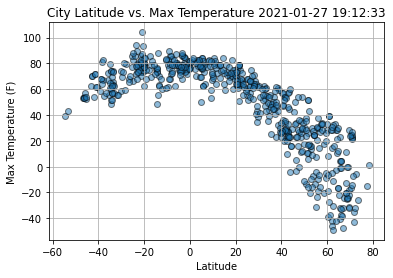

In [19]:
#plotting a scatter plot
plt.scatter(clean_city_data['Lat'],clean_city_data['Max Temp'],edgecolors="black",marker="o",alpha=0.5)

#adding title and label
plt.title(f"City Latitude vs. Max Temperature {clean_city_data['Date'][0]}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#saving figure and plotting
plt.savefig("./Figures/Lat_Vs_MaxTemp.png")
plt.show()



The temperature reduces near the poles. As the latitude increases the temperature drops.

## Latitude vs. Humidity Plot

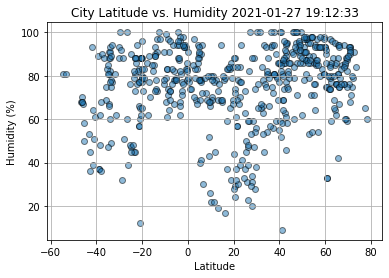

In [20]:
#plotting a scatter plot
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'],edgecolors="black",marker="o",alpha=0.5)

#adding title and label
plt.title(f"City Latitude vs. Humidity {clean_city_data['Date'][0]}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#saving figure and plotting
plt.savefig("./Figures/Lat_Vs_Humidity.png")
plt.show()

The humidity is high in the region with higher latitudes. The humidity percentage is lesser at times near the equator and mostly high as the latitude increases.

## Latitude vs. Cloudiness Plot

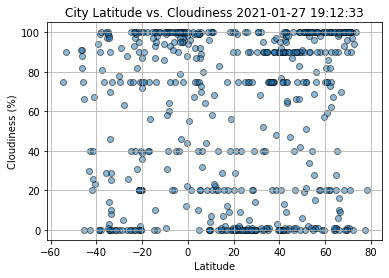

In [21]:
#plotting a scatter plot
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'],edgecolors="black",marker="o",alpha=0.5)

#adding title and label
plt.title(f"City Latitude vs. Cloudiness {clean_city_data['Date'][0]}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#saving figure and plotting
plt.savefig("./Figures/Lat_Vs_Cloudiness.png")
plt.show()

Cloudiness is very erratic and doe snot seem to have any correlation with lattitude.

## Latitude vs. Wind Speed Plot

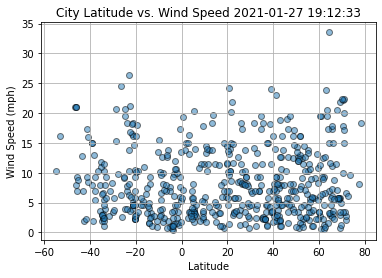

In [22]:
#plotting a scatter plot
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'],edgecolors="black",marker="o",alpha=0.5)

#adding title and label
plt.title(f"City Latitude vs. Wind Speed {clean_city_data['Date'][0]}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

#saving figure and plotting
plt.savefig("./Figures/Lat_Vs_Wind Speed.png")
plt.show()

The wind speed does not depend on the latitude much and there must be other variable associated with the dependency. Most of the cities have wind speed less than 20mph.

## Linear Regression

In [18]:
north_hemisphere_data=clean_city_data.loc[clean_city_data['Lat']>=0]
display(north_hemisphere_data)
south_hemisphere_data=clean_city_data.loc[clean_city_data['Lat']<0]
display(south_hemisphere_data)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Navoiy,40.0844,65.3792,26.60,86,0,6.91,UZ,2021-01-27 19:12:33
5,Portland,45.5234,-122.6762,42.01,91,87,4.88,US,2021-01-27 18:58:18
6,Sembakung,3.8167,117.2500,82.40,83,75,3.44,ID,2021-01-27 19:12:34
9,Dikson,73.5069,80.5464,-25.94,84,100,9.66,RU,2021-01-27 19:12:35
10,Sur,22.5667,59.5289,66.99,70,0,11.56,OM,2021-01-27 19:12:35
...,...,...,...,...,...,...,...,...,...
546,Tynda,55.1667,124.7167,-30.95,76,96,4.27,RU,2021-01-27 19:14:33
547,Mangan,27.5167,88.5333,61.02,29,0,3.44,IN,2021-01-27 19:14:33
548,Shestakovo,56.4915,103.9600,-6.77,87,100,8.99,RU,2021-01-27 19:14:33
549,Ocós,14.5094,-92.1933,75.20,94,1,5.10,GT,2021-01-27 19:14:34


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Kaitangata,-46.2817,169.8464,54.00,70,91,8.01,NZ,2021-01-27 19:12:33
2,Saint-Leu,-21.1500,55.2833,78.01,60,2,5.17,RE,2021-01-27 19:12:33
3,Bredasdorp,-34.5322,20.0403,48.20,81,3,2.35,ZA,2021-01-27 19:12:34
4,Ushuaia,-54.8000,-68.3000,39.20,81,75,10.36,AR,2021-01-27 19:08:43
7,Bluff,-46.6000,168.3333,53.01,68,91,21.00,NZ,2021-01-27 19:12:34
...,...,...,...,...,...,...,...,...,...
535,Burnie,-41.0667,145.9167,62.01,51,67,15.99,AU,2021-01-27 19:14:30
539,Olinda,-8.0089,-34.8553,78.80,69,75,8.05,BR,2021-01-27 19:14:31
542,Labuhan,-6.8844,112.2051,82.85,76,100,7.99,ID,2021-01-27 19:14:32
551,Malanje,-9.5402,16.3410,61.79,99,99,2.73,AO,2021-01-27 19:14:34


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8627529603146853


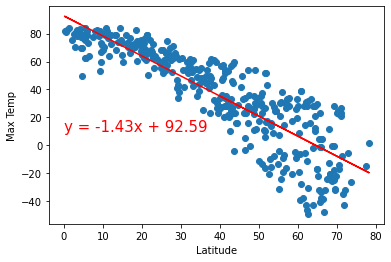

In [19]:
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemisphere_data['Lat'],north_hemisphere_data['Max Temp'])
#applying y=mx+b
regress_values = north_hemisphere_data['Lat']* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}")
plt.scatter(north_hemisphere_data['Lat'],north_hemisphere_data['Max Temp'])
plt.plot(north_hemisphere_data['Lat'],regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig("./Figures/NH_Temp_LR.png")
plt.show()


There is a strong negative correlation and when the latitude increases temperature decreases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.5607906300820951


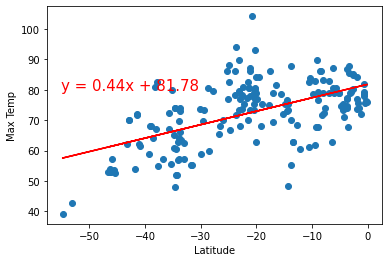

In [20]:
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemisphere_data['Lat'],south_hemisphere_data['Max Temp'])
#applying y=mx+b
regress_values = south_hemisphere_data['Lat']* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}")
plt.scatter(south_hemisphere_data['Lat'],south_hemisphere_data['Max Temp'])
plt.plot(south_hemisphere_data['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig("./Figures/SH_Temp_LR.png")
plt.show()


There is a strong positive correlation. This is because temperature goes down when we go near the poles.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.3145714801658366


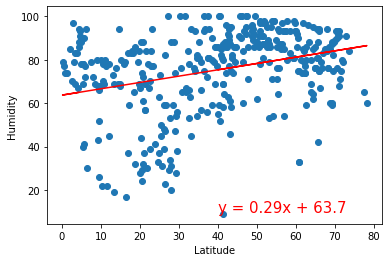

In [21]:
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemisphere_data['Lat'],north_hemisphere_data['Humidity'])
#applying y=mx+b
regress_values = north_hemisphere_data['Lat']* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}")
plt.scatter(north_hemisphere_data['Lat'],north_hemisphere_data['Humidity'])
plt.plot(north_hemisphere_data['Lat'],regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("./Figures/NH_humidity_LR.png")
plt.show()


There is no strong correlation between humidity and latitude.To make a better prediction model we must add other independent variables to predict humidity. This applies for both north and southern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.37321747931212074


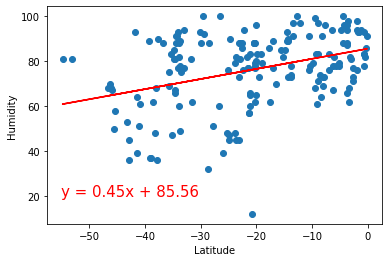

In [22]:
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemisphere_data['Lat'],south_hemisphere_data['Humidity'])
#applying y=mx+b
regress_values = south_hemisphere_data['Lat']* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}")
plt.scatter(south_hemisphere_data['Lat'],south_hemisphere_data['Humidity'])
plt.plot(south_hemisphere_data['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("./Figures/SH_humidity_LR.png")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.1998843668176849


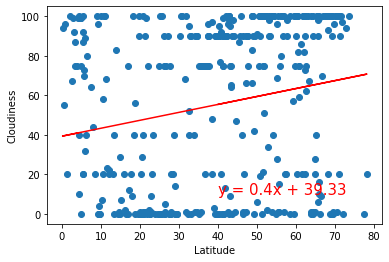

In [23]:
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemisphere_data['Lat'],north_hemisphere_data['Cloudiness'])
#applying y=mx+b
regress_values = north_hemisphere_data['Lat']* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}")
plt.scatter(north_hemisphere_data['Lat'],north_hemisphere_data['Cloudiness'])
plt.plot(north_hemisphere_data['Lat'],regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("./Figures/NH_cloudiness_LR.png")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.0642638125746578


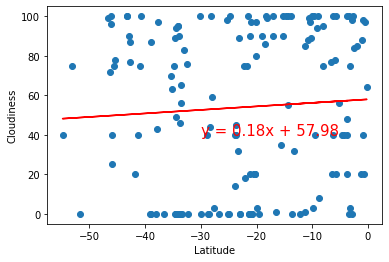

In [96]:
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemisphere_data['Lat'],south_hemisphere_data['Cloudiness'])
#applying y=mx+b
regress_values = south_hemisphere_data['Lat']* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}")
plt.scatter(south_hemisphere_data['Lat'],south_hemisphere_data['Cloudiness'])
plt.plot(south_hemisphere_data['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("./Figures/SH_cloudiness_LR.png")
plt.show()


There is no trend that is seen. Hence latitude is not the only dependent variable that could be used to predict cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.07499531368251826


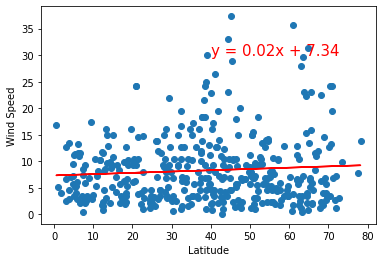

In [99]:
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemisphere_data['Lat'],north_hemisphere_data['Wind Speed'])
#applying y=mx+b
regress_values = north_hemisphere_data['Lat']* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}")
plt.scatter(north_hemisphere_data['Lat'],north_hemisphere_data['Wind Speed'])
plt.plot(north_hemisphere_data['Lat'],regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("./Figures/NH_wind_speed_LR.png")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.23753338839100793


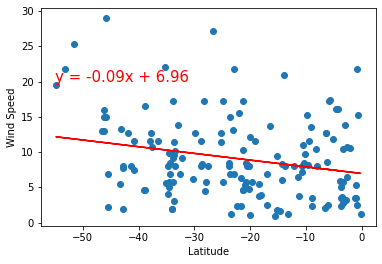

In [100]:
#linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemisphere_data['Lat'],south_hemisphere_data['Wind Speed'])
#applying y=mx+b
regress_values = south_hemisphere_data['Lat']* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}")
plt.scatter(south_hemisphere_data['Lat'],south_hemisphere_data['Wind Speed'])
plt.plot(south_hemisphere_data['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("./Figures/SH_wind_speed_LR.png")
plt.show()


The lines are sleeping lines and there is no proper trend that can be observed in the data. We need more variables to build a predicting model.

# Observations:
    
    

1. The temperature and latitude have a strong correlation and when the latitude increases the temperature decreases.
2. The wind speed in evenly distributed across the latitudes and it was mostly below 20mph in modt of the cities when the data      was collected.
3. The humdity and the latitude seems to have a little correlation though not very strong. Somemore variables can be used to        predict humidity to improve the model.